# **Lab 9: Support Vector Machines (SVM)**  
**Instructor:** Dr. Muhammad Naseer Bajwa  
**Lab Engineer:** Ms. Iram Tariq Bhatti  

**Submitted by:**Hira Sardar

# **Linear Data**

**Generating Linearly Separable Data**

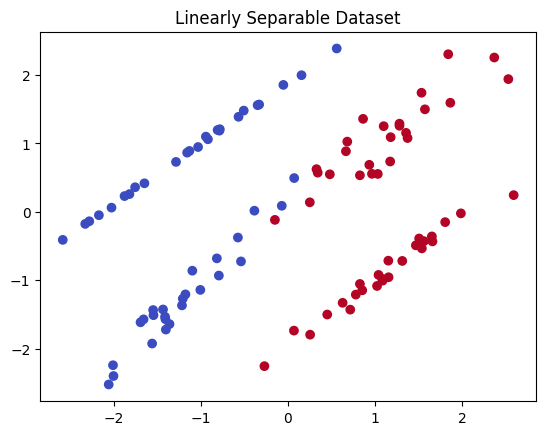

In [ ]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
# Generate data
X, y = make_classification(n_samples=100, n_features=2, n_classes=2,
 n_informative=2, n_redundant=0, random_state=42)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')
plt.title("Linearly Separable Dataset")
plt.show()


**Training SVM**

In [ ]:
from sklearn.svm import SVC
# Train the SVM
model = SVC(kernel='linear', C=1)
model.fit(X, y)
# Extract hyperplane parameters
w = model.coef_[0]
b = model.intercept_[0]

**Visualizing the Decision Boundary**

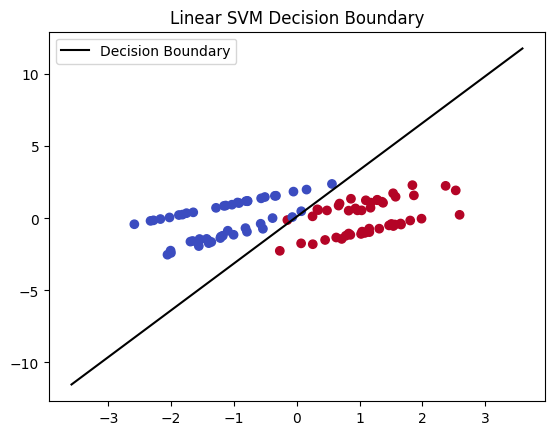

In [ ]:
import numpy as np
# Plot decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
xx = np.linspace(x_min, x_max, 100)
yy = -(w[0] * xx + b) / w[1] # Equation of hyperplane
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')
plt.plot(xx, yy, 'k-', label="Decision Boundary")
plt.legend()
plt.title("Linear SVM Decision Boundary")
plt.show()


**Varying values of C**

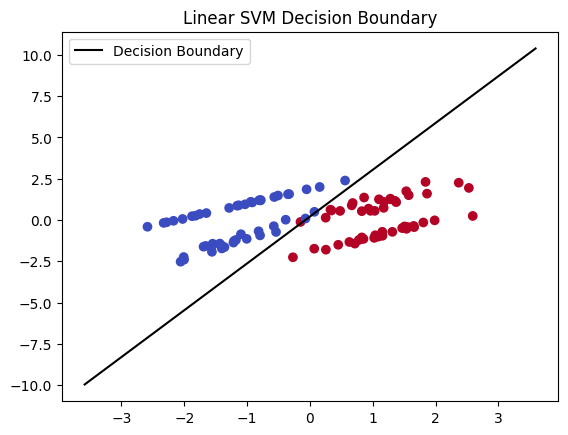

In [ ]:
from sklearn.svm import SVC
# Train the SVM
model = SVC(kernel='linear', C=10)
model.fit(X, y)
# Extract hyperplane parameters
w = model.coef_[0]
b = model.intercept_[0]

import numpy as np
# Plot decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
xx = np.linspace(x_min, x_max, 100)
yy = -(w[0] * xx + b) / w[1] # Equation of hyperplane
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')
plt.plot(xx, yy, 'k-', label="Decision Boundary")
plt.legend()
plt.title("Linear SVM Decision Boundary")
plt.show()


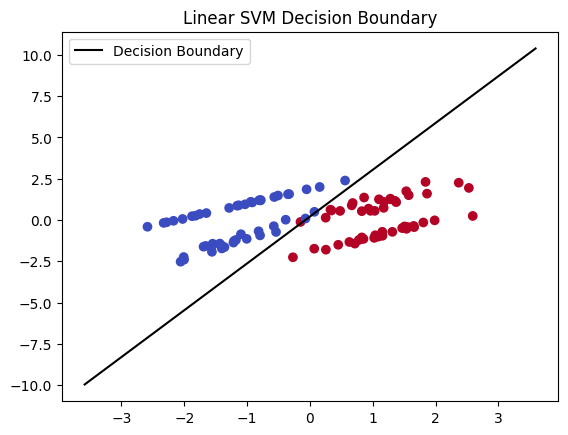

In [ ]:
from sklearn.svm import SVC
# Train the SVM
model = SVC(kernel='linear', C=10)
model.fit(X, y)
# Extract hyperplane parameters
w = model.coef_[0]
b = model.intercept_[0]

import numpy as np
# Plot decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
xx = np.linspace(x_min, x_max, 100)
yy = -(w[0] * xx + b) / w[1] # Equation of hyperplane
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')
plt.plot(xx, yy, 'k-', label="Decision Boundary")
plt.legend()
plt.title("Linear SVM Decision Boundary")
plt.show()


# **Non-Linear Data**

**Input Space**

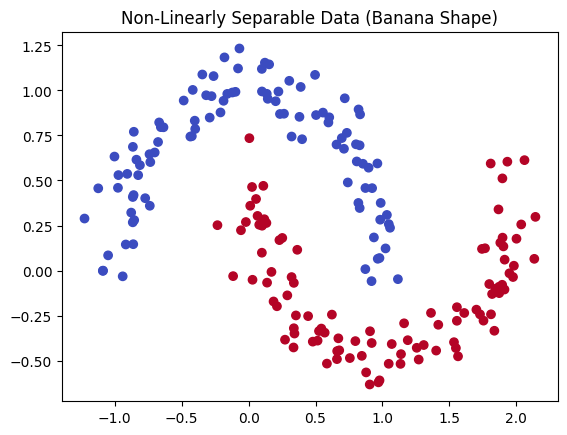

In [ ]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
# Generate data
X, y = make_moons(n_samples=200, noise=0.1, random_state=42)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')
plt.title("Non-Linearly Separable Data (Banana Shape)")
plt.show()


**Training SVM with RBF Kernel**

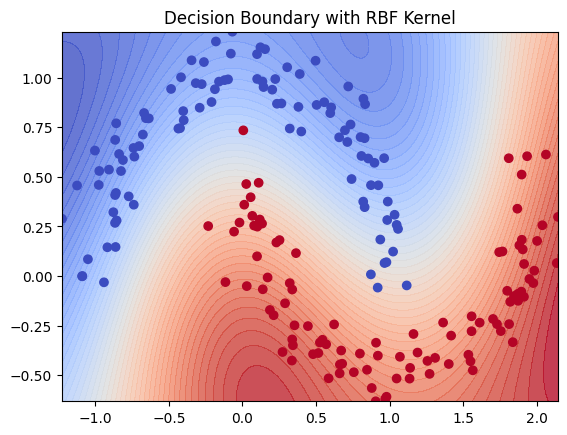

In [ ]:
from sklearn.svm import SVC
# Train SVM with RBF Kernel
model = SVC(kernel='rbf', C=1, gamma=0.5)
model.fit(X, y)
# Visualize decision boundary
import numpy as np
xx, yy = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 200),
 np.linspace(X[:, 1].min(), X[:, 1].max(), 200))
Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), Z.max(), 50), cmap="coolwarm",
alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')
plt.title("Decision Boundary with RBF Kernel")
plt.show()


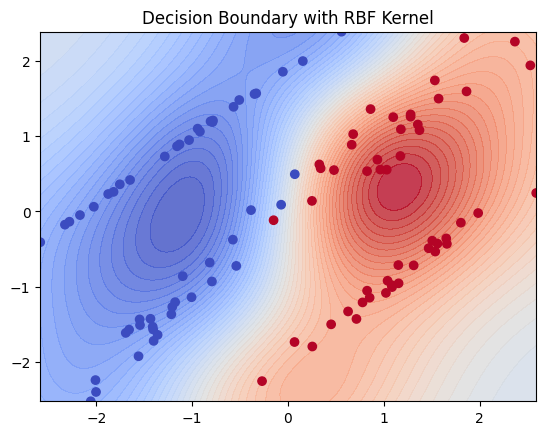

In [ ]:
from sklearn.svm import SVC
# Train SVM with RBF Kernel
model = SVC(kernel='rbf', C=10, gamma=0.5)
model.fit(X, y)
# Visualize decision boundary
import numpy as np
xx, yy = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 200),
 np.linspace(X[:, 1].min(), X[:, 1].max(), 200))
Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), Z.max(), 50), cmap="coolwarm",
alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')
plt.title("Decision Boundary with RBF Kernel")
plt.show()


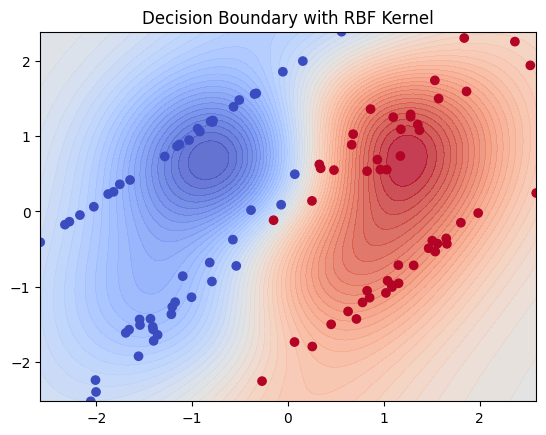

In [ ]:
from sklearn.svm import SVC
# Train SVM with RBF Kernel
model = SVC(kernel='rbf', C=100, gamma=0.5)
model.fit(X, y)
# Visualize decision boundary
import numpy as np
xx, yy = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 200),
 np.linspace(X[:, 1].min(), X[:, 1].max(), 200))
Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), Z.max(), 50), cmap="coolwarm",
alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')
plt.title("Decision Boundary with RBF Kernel")
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
# Define parameter grid
param_grid = {
 'C': [0.1, 1, 10],
 'gamma': [0.1, 0.5, 1],
 'kernel': ['rbf']
}
# Initialize GridSearch
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, y)
# Best parameters
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'C': 10, 'gamma': 0.5, 'kernel': 'rbf'}


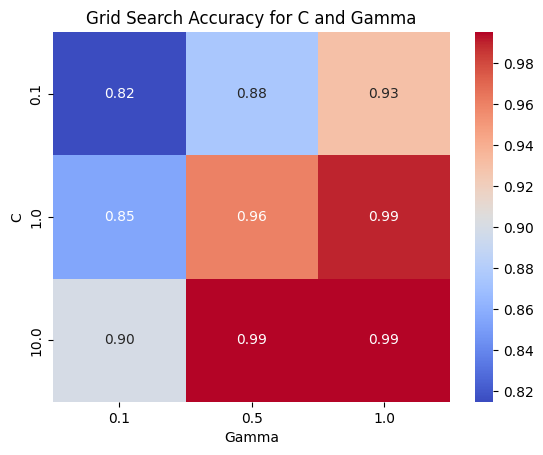

In [ ]:
import seaborn as sns
import pandas as pd
# Example results (from grid_search.cv_results_)
results = pd.DataFrame(grid_search.cv_results_)
pivot_table = results.pivot(index='param_C', columns='param_gamma',
values='mean_test_score')
# Heatmap
sns.heatmap(pivot_table, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Grid Search Accuracy for C and Gamma")
plt.xlabel("Gamma")
plt.ylabel("C")
plt.show()


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
random_search = RandomizedSearchCV(SVC(), param_grid, n_iter=10, cv=5,
scoring='accuracy', random_state=42)
random_search.fit(X, y)
print("Best Parameters:", random_search.best_params_)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Parameters: {'kernel': 'rbf', 'gamma': 0.5, 'C': 10}


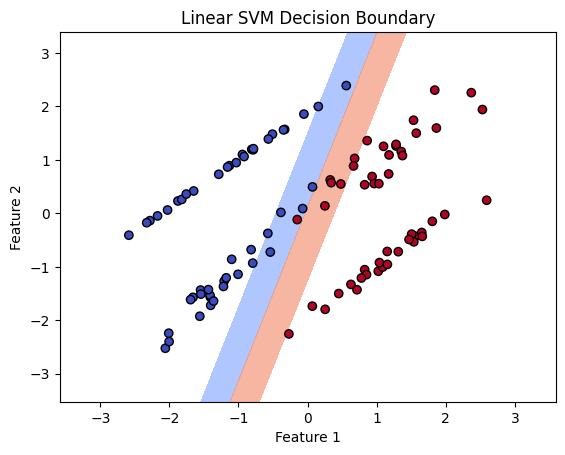

In [ ]:
from sklearn.datasets import make_classification
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np
# Generate synthetic data
X, y = make_classification(n_features=2, n_classes=2, n_informative=2, n_redundant=0,
random_state=42)
# Train an SVM
model = SVC(kernel='linear', C=1)
model.fit(X, y)
# Create a grid to plot decision boundary
xx, yy = np.meshgrid(np.linspace(X[:, 0].min()-1, X[:, 0].max()+1, 100),
 np.linspace(X[:, 1].min()-1, X[:, 1].max()+1, 100))
# Predict values for the grid
Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
# Plot decision boundary
plt.contourf(xx, yy, Z, levels=[-1, 0, 1], alpha=0.7, cmap='coolwarm', linestyles=['--', '-',
'--'])
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='coolwarm')
plt.title("Linear SVM Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


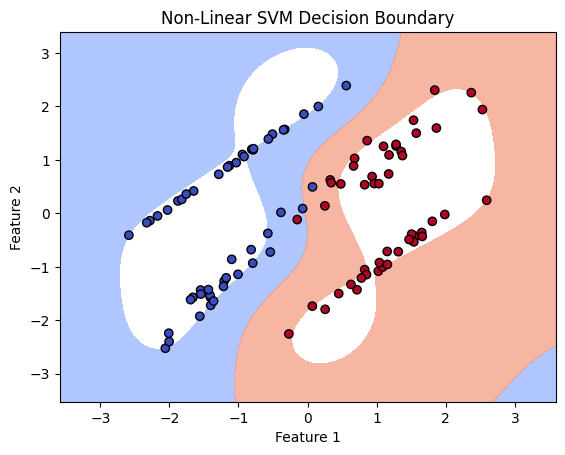

In [ ]:
# Train an SVM with RBF kernel
model_rbf = SVC(kernel='rbf', C=1, gamma=0.5)
model_rbf.fit(X, y)
# Predict values for the grid
Z_rbf = model_rbf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z_rbf = Z_rbf.reshape(xx.shape)
# Plot decision boundary
plt.contourf(xx, yy, Z_rbf, levels=[-1, 0, 1], alpha=0.7, cmap='coolwarm', linestyles=['--',
'-', '--'])
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='coolwarm')
plt.title("Non-Linear SVM Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


**Checking for various values of C**

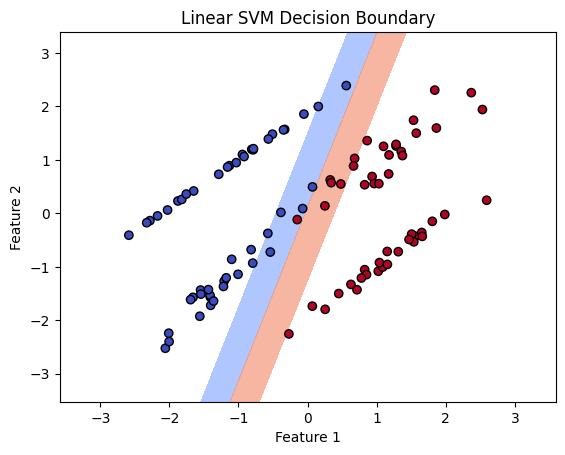

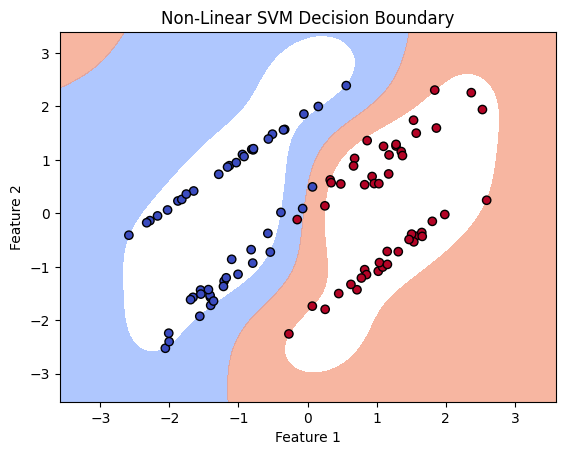

In [ ]:
from sklearn.datasets import make_classification
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np
# Generate synthetic data
X, y = make_classification(n_features=2, n_classes=2, n_informative=2, n_redundant=0,
random_state=42)
# Train an SVM
model = SVC(kernel='linear', C=1)
model.fit(X, y)
# Create a grid to plot decision boundary
xx, yy = np.meshgrid(np.linspace(X[:, 0].min()-1, X[:, 0].max()+1, 100),
 np.linspace(X[:, 1].min()-1, X[:, 1].max()+1, 100))
# Predict values for the grid
Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
# Plot decision boundary
plt.contourf(xx, yy, Z, levels=[-1, 0, 1], alpha=0.7, cmap='coolwarm', linestyles=['--', '-',
'--'])
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='coolwarm')
plt.title("Linear SVM Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


# Train an SVM with RBF kernel
model_rbf = SVC(kernel='rbf', C=10, gamma=0.5)
model_rbf.fit(X, y)
# Predict values for the grid
Z_rbf = model_rbf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z_rbf = Z_rbf.reshape(xx.shape)
# Plot decision boundary
plt.contourf(xx, yy, Z_rbf, levels=[-1, 0, 1], alpha=0.7, cmap='coolwarm', linestyles=['--',
'-', '--'])
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='coolwarm')
plt.title("Non-Linear SVM Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()




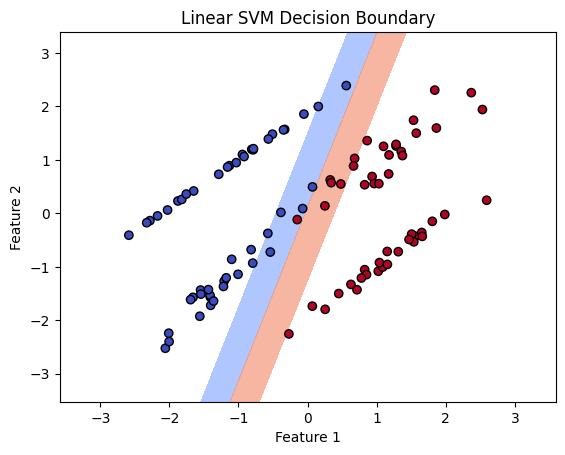

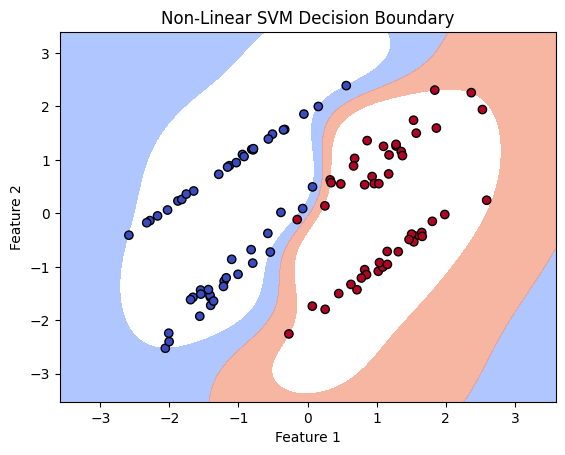

In [ ]:
from sklearn.datasets import make_classification
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np
# Generate synthetic data
X, y = make_classification(n_features=2, n_classes=2, n_informative=2, n_redundant=0,
random_state=42)
# Train an SVM
model = SVC(kernel='linear', C=1)
model.fit(X, y)
# Create a grid to plot decision boundary
xx, yy = np.meshgrid(np.linspace(X[:, 0].min()-1, X[:, 0].max()+1, 100),
 np.linspace(X[:, 1].min()-1, X[:, 1].max()+1, 100))
# Predict values for the grid
Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
# Plot decision boundary
plt.contourf(xx, yy, Z, levels=[-1, 0, 1], alpha=0.7, cmap='coolwarm', linestyles=['--', '-',
'--'])
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='coolwarm')
plt.title("Linear SVM Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


# Train an SVM with RBF kernel
model_rbf = SVC(kernel='rbf', C=100, gamma=0.5)
model_rbf.fit(X, y)
# Predict values for the grid
Z_rbf = model_rbf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z_rbf = Z_rbf.reshape(xx.shape)
# Plot decision boundary
plt.contourf(xx, yy, Z_rbf, levels=[-1, 0, 1], alpha=0.7, cmap='coolwarm', linestyles=['--',
'-', '--'])
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='coolwarm')
plt.title("Non-Linear SVM Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()




# Mini Challenge

In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
banknote_authentication = fetch_ucirepo(id=267)

# data (as pandas dataframes)
X = banknote_authentication.data.features
y = banknote_authentication.data.targets

# metadata
print(banknote_authentication.metadata)

# variable information
print(banknote_authentication.variables)


{'uci_id': 267, 'name': 'Banknote Authentication', 'repository_url': 'https://archive.ics.uci.edu/dataset/267/banknote+authentication', 'data_url': 'https://archive.ics.uci.edu/static/public/267/data.csv', 'abstract': 'Data were extracted from images that were taken for the evaluation of an authentication procedure for banknotes.', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1372, 'num_features': 4, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2012, 'last_updated': 'Fri Feb 16 2024', 'dataset_doi': '10.24432/C55P57', 'creators': ['Volker Lohweg'], 'intro_paper': None, 'additional_info': {'summary': 'Data were extracted from images that were taken from genuine and forged banknote-like specimens.  For digitization, an industrial camera usually used for print inspection was used. The final im

**Inspecting the data**

In [ ]:
import pandas as pd

# Display first few rows of features and targets
print(X.head())
print(y.head())


   variance  skewness  curtosis  entropy
0   3.62160    8.6661   -2.8073 -0.44699
1   4.54590    8.1674   -2.4586 -1.46210
2   3.86600   -2.6383    1.9242  0.10645
3   3.45660    9.5228   -4.0112 -3.59440
4   0.32924   -4.4552    4.5718 -0.98880
   class
0      0
1      0
2      0
3      0
4      0


**Histograms**

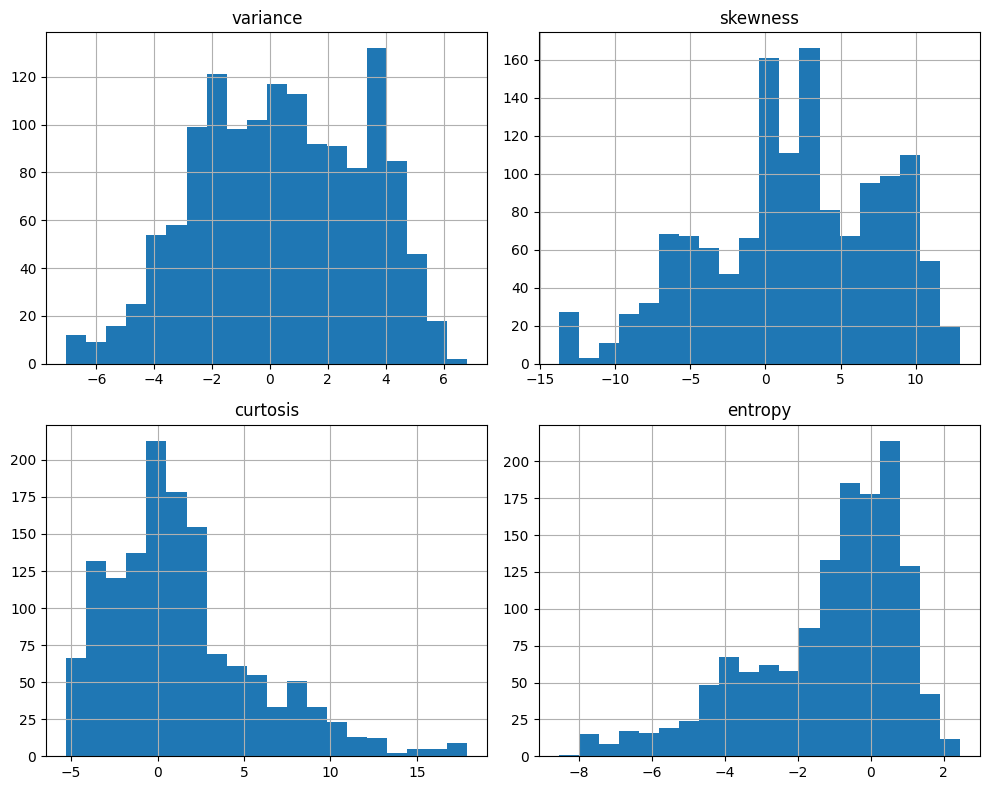

In [ ]:
import matplotlib.pyplot as plt

X.hist(figsize=(10, 8), bins=20)
plt.tight_layout()
plt.show()


**Pair Plot and Scatter plot**

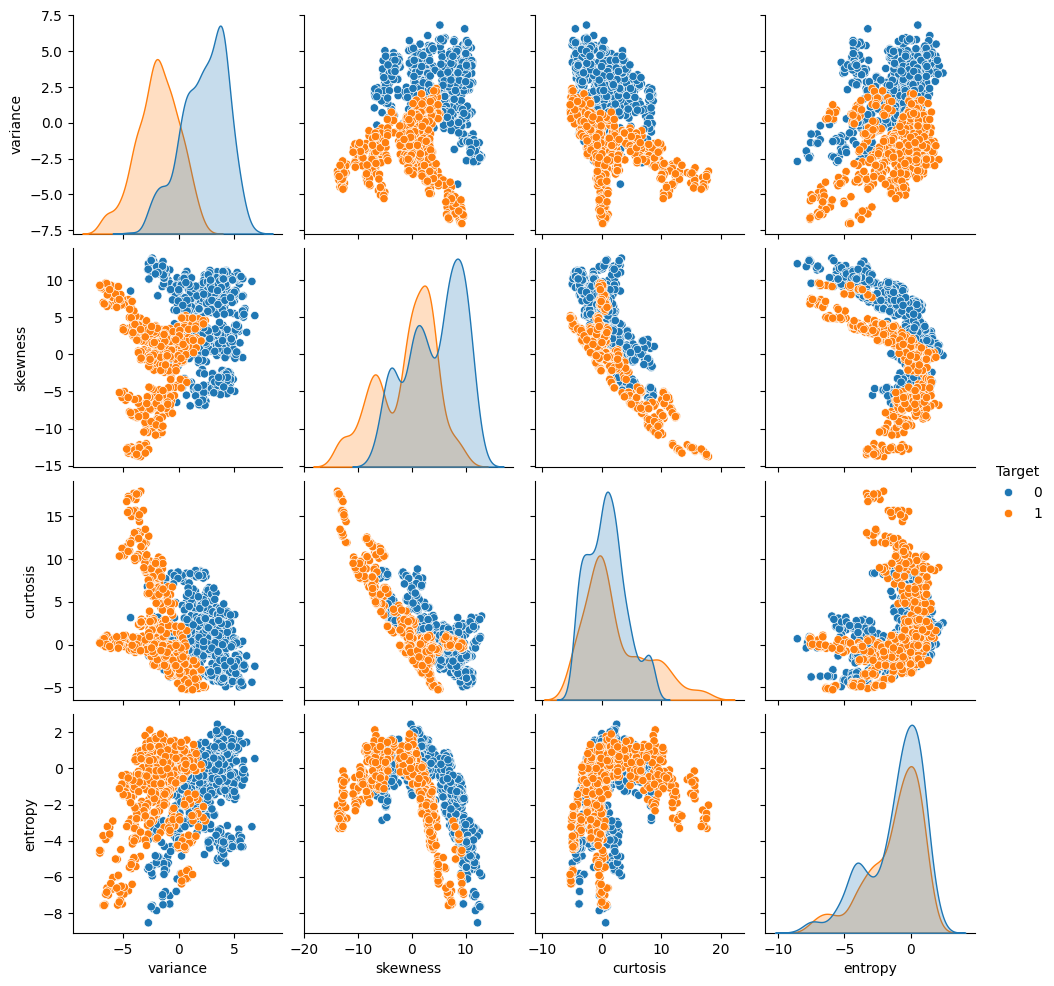

In [ ]:
import seaborn as sns

# Combine features and target for plotting
df = pd.concat([X, y.rename(columns={y.columns[0]: 'Target'})], axis=1) # Changed this line

# Pair plot with hue based on the target
sns.pairplot(df, hue='Target')
plt.show()

**Correlation Heatmap**

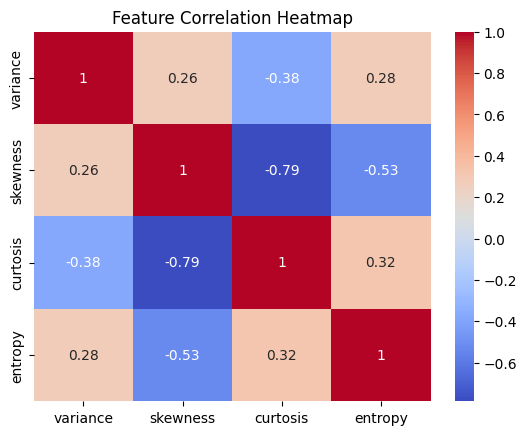

In [ ]:
corr_matrix = X.corr()

# Heatmap of correlations
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


**Boxplots**

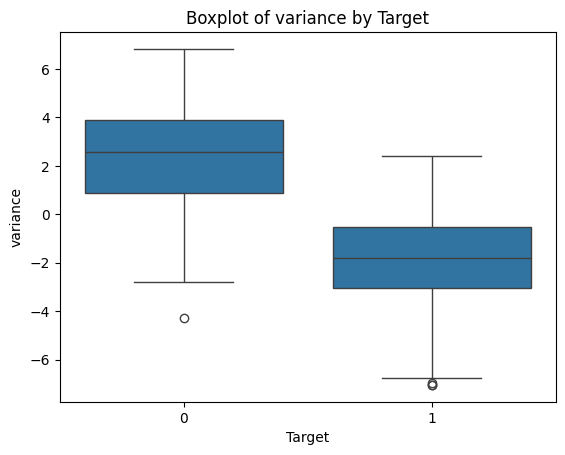

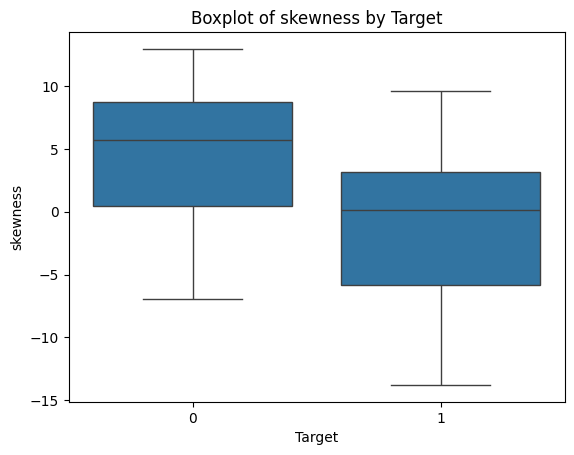

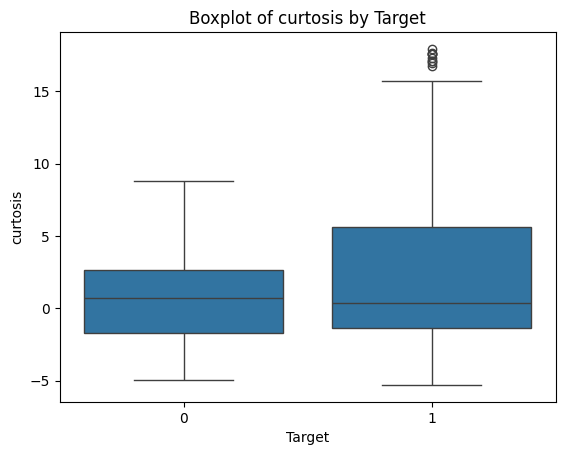

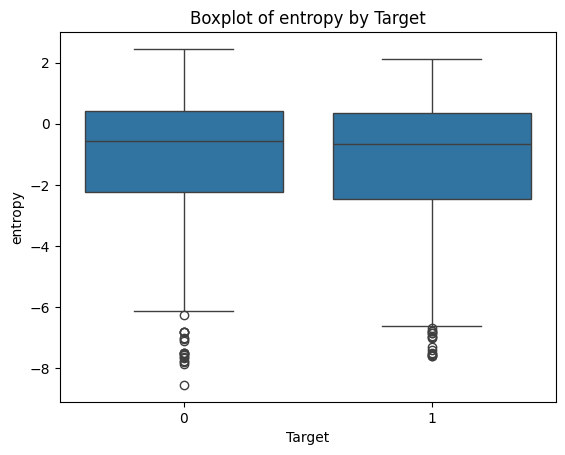

In [ ]:
for column in X.columns:
    sns.boxplot(x=df['Target'], y=df[column])
    plt.title(f'Boxplot of {column} by Target')
    plt.show()


In [ ]:
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Train SVM with RBF kernel
svm_rbf = SVC(kernel='rbf', C=0.1, random_state=42)
svm_rbf.fit(X_train, y_train)



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=0.1, random_state=42)

In [ ]:
# Evaluate the model on the test set
y_pred = svm_rbf.predict(X_test)

# Print evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9855
Precision: 0.9683
Recall: 1.0000
F1 Score: 0.9839

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       153
           1       0.97      1.00      0.98       122

    accuracy                           0.99       275
   macro avg       0.98      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



In order to make a decision boundary here, we only need two features due to the 2-dimensional coordinate system. We can randomly select two features and make decision boundary.
**Since we are using PCA, I will be extracting the two most important features.**

# **Using the 2D PCA**

In [ ]:
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
import numpy as np

# Apply PCA to reduce to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Split PCA-reduced data
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42, stratify=y)


# Train SVM on PCA-reduced data
svm_pca_model = SVC(kernel='rbf', random_state=42)
svm_pca_model.fit(X_train_pca, y_train_pca)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(random_state=42)

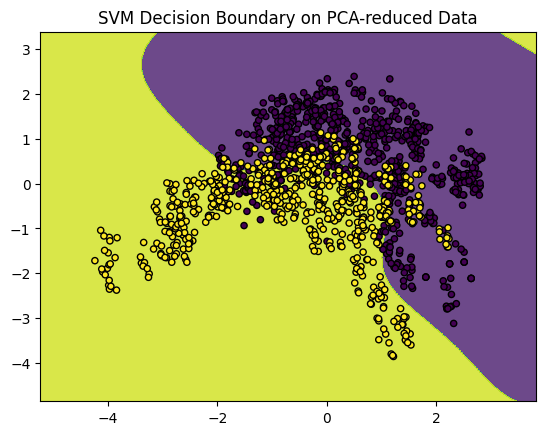

In [ ]:
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
import numpy as np


# Plot decision boundary
def plot_decision_boundary(X, y, model, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)

    # Convert y to a 1D numpy array if it's a DataFrame
    if isinstance(y, pd.DataFrame):
        y = y.values.ravel() #This line converts DataFrame to 1d array

    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=20) #If y is DataFrame error will happen here.
    plt.title(title)
    plt.show()

plot_decision_boundary(X_pca, y, svm_pca_model, "SVM Decision Boundary on PCA-reduced Data")

# **Bonus Task**

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best Parameters: {'C': 1, 'gamma': 'scale'}
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       153
           1       1.00      1.00      1.00       122

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



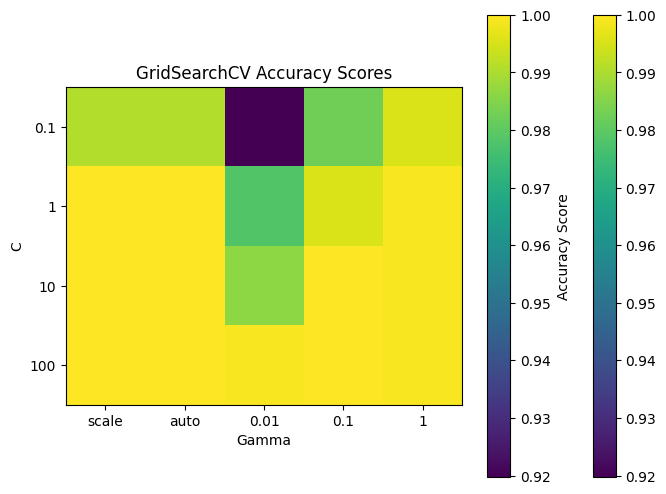

In [ ]:
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
import numpy as np

# fetch dataset
banknote_authentication = fetch_ucirepo(id=267)

# data (as pandas dataframes)
X = banknote_authentication.data.features
y = banknote_authentication.data.targets


# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Set up the parameter grid for GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'gamma': ['scale', 'auto', 0.01, 0.1, 1]  # Kernel coefficient
}

# Set up the SVM model with RBF kernel
svm_rbf = SVC(kernel='rbf', random_state=42)

# Set up GridSearchCV to search for the best combination of C and gamma
grid_search = GridSearchCV(svm_rbf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)

# Print evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Best Parameters: {best_params}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot a heatmap of accuracy scores for various combinations of C and gamma
# Get the results of the grid search and reshape them for plotting
results = grid_search.cv_results_
scores_matrix = np.array(results['mean_test_score']).reshape(len(param_grid['C']), len(param_grid['gamma']))

# Plot the heatmap
plt.figure(figsize=(8, 6))
plt.imshow(scores_matrix, interpolation='nearest')
plt.title("GridSearchCV Accuracy Scores")
plt.xlabel("Gamma")
plt.ylabel("C")
plt.xticks(np.arange(len(param_grid['gamma'])), param_grid['gamma'])
plt.yticks(np.arange(len(param_grid['C'])), param_grid['C'])
plt.colorbar()
plt.colorbar().set_label('Accuracy Score')
plt.show()


### Model Accuracy and Explanation

The model achieved an accuracy of **1.0000** on the test set, meaning that all the test samples were correctly classified. This was followed by perfect precision, recall, and F1 scores for both classes.

**Possible Reasons for Perfect Accuracy:**

1. **Overfitting:**  
   While overfitting typically leads to a model performing very well on training data but poorly on unseen test data, this was not observed here. The model achieved perfect performance on both the training and test sets, suggesting that overfitting was not a significant issue.

2. **Simplistic Dataset:**  
   The dataset used, the `Banknote Authentication` dataset, consists of features extracted from images of genuine and forged banknotes. These features might be highly discriminative, allowing the model to separate the two classes with ease, leading to perfect classification results.

3. **Hyperparameter Tuning:**  
   The best hyperparameters, `C=1` and `gamma='scale'`, were identified using **GridSearchCV**. These hyperparameters appear to be well-suited for the data, providing a balanced model that generalizes well while accurately classifying the test set.

4. **Standardization of Features:**  
   The features were standardized using the **StandardScaler**, which ensures that all features have zero mean and unit variance. This is particularly important for SVM models, which are sensitive to the scale of the data. The proper scaling likely contributed to the model's excellent performance.

5. **Data Split and Stratification:**  
   I used **stratified sampling** when splitting the dataset, ensuring that the class distribution in the training and test sets was similar. This technique helps avoid the model being biased toward one class, which is important for achieving balanced performance across classes.

6. **Balanced Dataset:**  
   The `Banknote Authentication` dataset is relatively balanced, meaning the number of samples from each class is similar. This avoids the issue of the model being biased toward the majority class, which could artificially inflate accuracy.



# **Summary of Mini Challenge: Banknote Authentication with SVM**  

This challenge involves using the **Banknote Authentication dataset** to train and evaluate an SVM classifier. The process is broken down into several key steps, including data exploration, visualization, dimensionality reduction, and hyperparameter tuning.

---

## **1. Data Loading and Exploration**  
- The dataset is fetched using the `ucimlrepo` library.  
- Features and target variables are separated and inspected for metadata and variable information.  

---

## **2. Data Visualization**  
- **Histograms:** Visualize the distribution of features to understand the data better.  
- **Pair Plot:** Generate scatter plots of feature pairs with color-coded target labels to analyze patterns and relationships.  
- **Correlation Heatmap:** Display feature correlations to identify multicollinearity.  
- **Boxplots:** Compare feature distributions across different target classes.

---

## **3. Data Preprocessing and Model Training**  
- The features are standardized using **StandardScaler** for better SVM performance.  
- The dataset is split into training and testing sets (80% train, 20% test) with stratified sampling to maintain class balance.  
- An **SVM** with an RBF kernel is trained on the scaled data.

---

## **4. Dimensionality Reduction and Decision Boundary**  
- **PCA (Principal Component Analysis)** is applied to reduce the data to 2 dimensions for visualization.  
- A decision boundary is plotted to visualize the separation of classes by the SVM model.

---

## **5. Hyperparameter Tuning**  
- **GridSearchCV** is used to optimize the SVM's `C` (regularization) and `gamma` (kernel coefficient) parameters.  
- A heatmap of accuracy scores from the grid search is plotted to visualize performance across different parameter combinations.

---

## **6. Model Evaluation**  
- The best model is evaluated on the test set, and key metrics such as **accuracy**, **precision**, **recall**, and **F1 score** are reported.  
- A classification report is generated to provide detailed insights into the model's performance across classes.

---

This workflow demonstrates a complete machine learning pipeline, from data exploration to model optimization, making it an excellent template for real-world classification problems.